In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

In [3]:
max_review_len = max([len(s.split()) for s in sentences])

tokenizing data

In [4]:
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

In [5]:
vocab_size = len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

input_dim = max_review_len
print(input_dim)

11821


In [6]:
#Encoding the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=1000)

In [7]:
#first mistake: (NameError: name 'input_dim' is not defined) I changed it to 2000 as we gave the num_words

model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_review_len))
#If inputs are shaped (batch, ) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).
model.add(Flatten())

model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [8]:
history= model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
31/31 [==============================] - 31s 483ms/step - loss: 15.9272 - acc: 0.0576 - val_loss: 3.2569 - val_acc: 0.0542
Epoch 2/5
31/31 [==============================] - 14s 465ms/step - loss: 3.1302 - acc: 0.0767 - val_loss: 2.8797 - val_acc: 0.0919
Epoch 3/5
31/31 [==============================] - 14s 465ms/step - loss: 2.7548 - acc: 0.1924 - val_loss: 2.4466 - val_acc: 0.3906
Epoch 4/5
31/31 [==============================] - 15s 477ms/step - loss: 2.1990 - acc: 0.4730 - val_loss: 1.6924 - val_acc: 0.5988
Epoch 5/5
31/31 [==============================] - 15s 476ms/step - loss: 1.3015 - acc: 0.7251 - val_loss: 1.0952 - val_acc: 0.7219


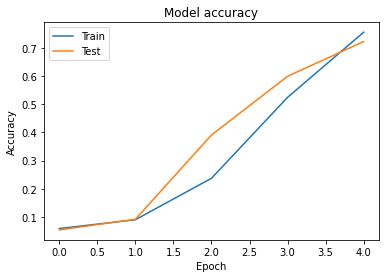

In [9]:
#4. Plot the loss and accuracy using history object.

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

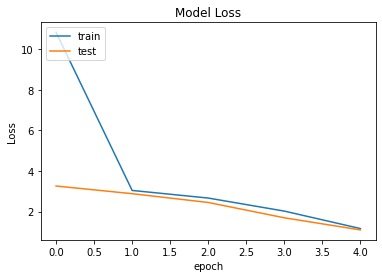

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 5. Predict over one sample of data and check what will be the prediction for that.

In [16]:
predictedmodel = model.predict(X_test[5].reshape(1, 11821))
print("Actual value=" + str(y_test[5]) + "\n", " Predicted value=" + str(predictedmodel.argmax()))

Actual value=10
  Predicted value=10
